In [1]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

In [2]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


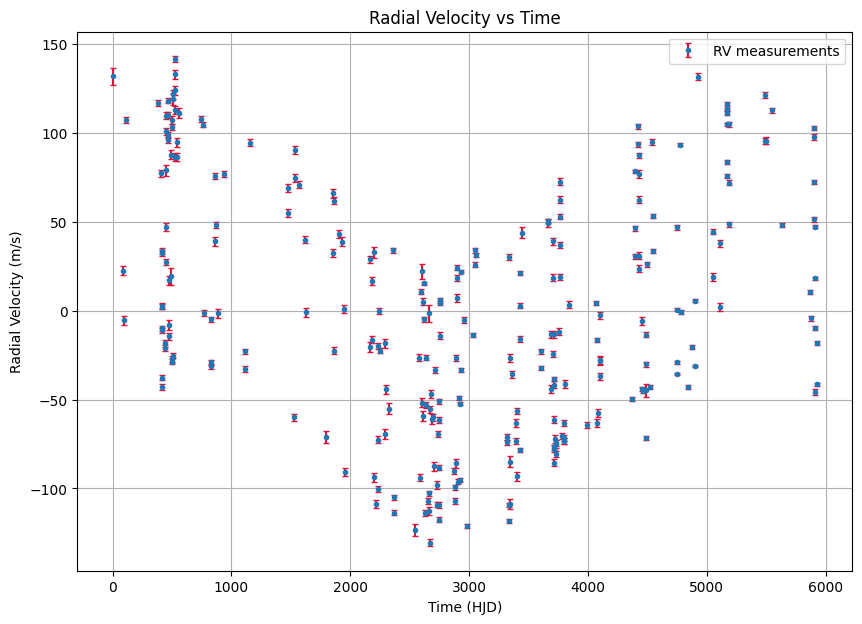

In [3]:
hjd = np.array(data['HJD'], dtype=np.float64)
radial_velocity = np.array(data['Radial_Velocity'], dtype=np.float64)
uncertainty = np.array(data['Radial_Velocity_Uncertainty'], dtype=np.float64)

# Change time reference to first datapoint to reduce large HJD
scaled_hjd = hjd - hjd[0]

plt.figure(figsize=(10, 7))

plt.errorbar(scaled_hjd, radial_velocity, yerr=uncertainty, fmt='o', ecolor='crimson', capsize=2, markersize=3, label='RV measurements')

plt.xlabel("Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Radial Velocity vs Time")
plt.legend()
plt.grid()
plt.savefig("rv_data_plot.pdf")
plt.show()

# Fit the oscillatory function to the data

In [4]:
# Define oscillatory model: amplitude, phase shift, period, vertical offset

def f_curve(x,amplitude,start,period,offset):
    return amplitude * np.sin(2.0 * np.pi * (x-start)/period ) + offset

initial_guess = [60, 1000, 5000, 0]
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity,
                                        sigma=uncertainty, absolute_sigma=True,
                                        p0=initial_guess)
K1, phi1, P1, offset1 = params

# Ensure positive amplitude
if K1 < 0:
    K1 *= -1
    phi1 += P1 / 2

print(f"Best fit: K1 = {K1:.2f} m/s, P1 = {P1:.2f} d, phi1 = {phi1:.2f} d, offset1 = {offset1:.2f} m/s")

Best fit: K1 = 47.92 m/s, P1 = 4806.92 d, phi1 = 4221.92 d, offset1 = -1.42 m/s


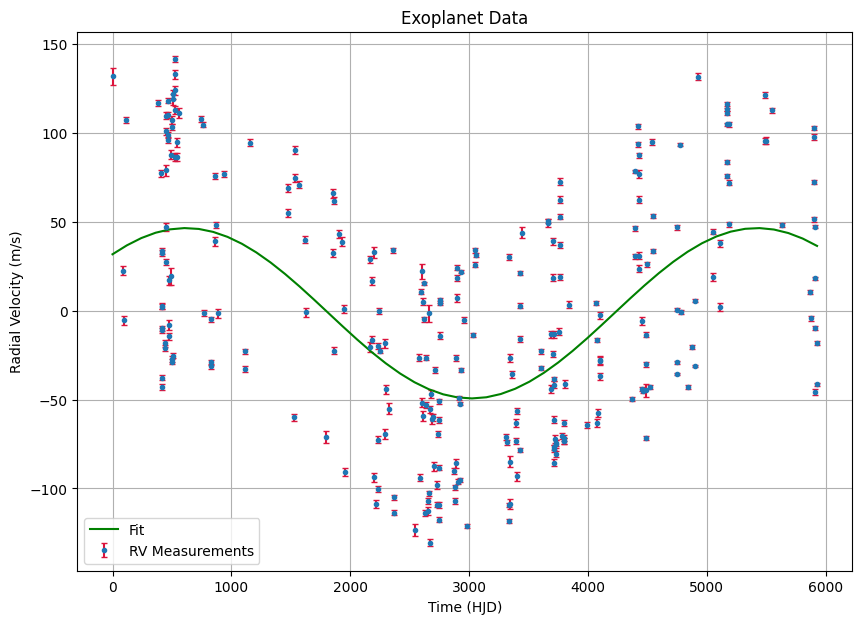

In [5]:
# lets see how the best fit model looks by plotting it along with the data

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)))
y_fit = f_curve(x_fit, *params)     # providing '*params' is called unpacking and is identical to write
                                    # 'params[0], params[1], params[2]...'

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, markersize=3, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Exoplanet Data")
plt.xlabel(f"Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.legend()
plt.grid()
plt.savefig("planet1_fit.pdf")
plt.show()

# Calculate the residuals

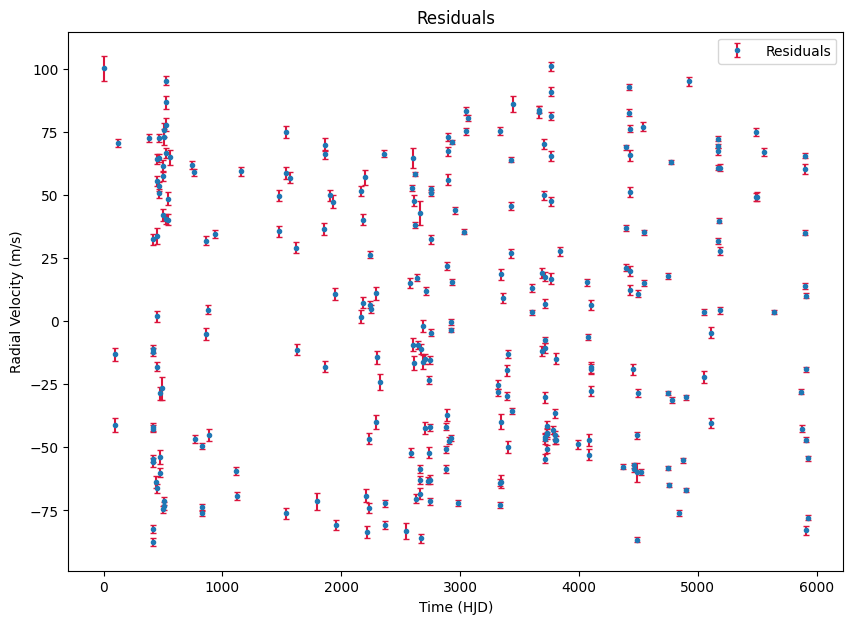

In [6]:
# calculate residuals
y_pred = f_curve(scaled_hjd, *params)
residuals = radial_velocity - y_pred

plt.figure(figsize=(10, 7))

# plot residuals
plt.errorbar(x=scaled_hjd, y=residuals, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, markersize=3, label="Residuals")
#plt.errorbar(scaled_hjd, residuals, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time (HJD)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

plt.show()

# Calculate residual mean, stdev, rms

In [7]:
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
residuals_rms = np.sqrt(np.mean(residuals**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.8498854684619068
Residuals stdev is 52.2121060812347295
Residuals RMS is   52.2121060812347295


# Second exoplanet

In [8]:
initial_guess2 = [70, 0, 14.65, 0]

params2, _ = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity,
                                sigma=uncertainty, absolute_sigma=True,
                                p0=initial_guess2, maxfev=10000)

K2, phi2, P2, offset2 = params2

print(f"K2 = {K2:.2f} m/s, P2 = {P2:.2f} d, phi2 = {phi2:.2f} d, offset2 = {offset2:.2f} m/s")

K2 = 74.49 m/s, P2 = 14.65 d, phi2 = -4.41 d, offset2 = 4.56 m/s


# Third Exoplanet

In [9]:
initial_guess3 = [6, 0, 0.74, 0]

params3, _ = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity,
                                sigma=uncertainty, absolute_sigma=True,
                                p0=initial_guess3, maxfev=10000)

K3, phi3, P3, offset3 = params3

print(f"K3 = {K3:.2f} m/s, P3 = {P3:.2f} d, phi3 = {phi3:.2f} d, offset3 = {offset3:.2f} m/s")

K3 = 6.44 m/s, P3 = 0.74 d, phi3 = 0.09 d, offset3 = 1.84 m/s


# Calculate the mass of the exoplanets

In [10]:
M_star = 0.95  # Mass of star in solar masses (from NASA Archive)
K_list = [K1, K2, K3]
P_list = [P1, P2, P3]

def estimate_mass(K, P, M_star): # Mass formula provided
    return (K/28.4) * (P/365)**(1/3) * M_star**(2/3)

for i, (K, P) in enumerate(zip(K_list, P_list), 1):
    m_jup = estimate_mass(K, P, M_star)
    print(f"Planet {i}: K = {K:.2f} m/s, P = {P:.2f} d, M ≈ {m_jup:.3f} M_Jup")

Planet 1: K = 47.92 m/s, P = 4806.92 d, M ≈ 3.851 M_Jup
Planet 2: K = 74.49 m/s, P = 14.65 d, M ≈ 0.868 M_Jup
Planet 3: K = 6.44 m/s, P = 0.74 d, M ≈ 0.028 M_Jup
